# Fall 2023 MSBA 605 Practice Final

Throughout this final project, you and your team mates will need take the steps to derive meaning from the provided data sets. These steps may or may not include the need to clean data sets (including replacing missing values, merging datasets, and creating variables) to accomplish the requested analyses. You will be expected to **display the data in the appropriate visualization**, **test assumptions of your statistical analysis**, **carry out the appropriate statistical analysis**, **interpret the results** to obtain full credit.

Please note, where we may violate assumptions, please continue with the analysis but note these violations in your interpretation.

### Scenario:
You were just hired by an organization that prepares and delivers meals to other companies for a variety of events. They have been collecting data regarding all inquires made of the company regarding potential meals and invoices charged for meals ultimately ordered.

Now that you have come on board, the organization has asked you to derive some insights from the data they have been collecting. They have asked you to conduct 3 analyses to begin and suggest future analyses.



### Data Information:

There are two data sets:
1. OrderLeads_final: This contain information regarding all order inquries regardless of whether the order was ultimately placed
    - Order Id: Unique Id for each order or order inquiry
    - Company Id: Unique Company Id
    - Date: Date of Inquiry
    - Order Value: the value of the inquiry
    - Company Num: Unique Company Number
    - Company Type: Which type of company (values are: Non-Profit, Government, Education, Private)
2. Invoices_final: This contains information for only orders that were placed and invoiced
    - Order Id: Unique Id for each order or order inquiry
    - Date: Date of Invoice
    - Meal Id: Unique Id of Meal
    - Company Id: Unique Company Id
    - Date of Meal: Date of Meal Delivery
    - Meal Price: Cost of Meal
    - Type of Meal: Meal Type (values: Breakfast, Lunch, Dinner)
    - Conversion: Indicates conversion from inquire to invoice

The original data sets were pulled from kaggle.com but has been modified to fit the purpose of this assignment.

In [1]:
import pandas as pd #pandas import
import numpy as np #numpy import
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) #displays all columns instead of a max of 20


#### Analysis 1:
Test whether meal price differs based on type of meal

In [10]:
orders_leads=pd.read_csv(r'OrderLeads_final.csv')
orders_leads = orders_leads.rename(columns={'Date': 'Date of Inquiry'})
orders_leads.head()


,Order Id,Company Id,Date of Inquiry,Order Value,Company Num,Company Type
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,2/18/2017,4875,Company1,Non-Profit
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,7/30/2015,8425,Company1,Non-Profit
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,5/27/2016,4837,Company1,Non-Profit
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,9/27/2018,343,Company1,Non-Profit
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,1/14/2016,983,Company1,Non-Profit


In [9]:
orders_leads=pd.read_csv(r'OrderLeads_final.csv')
orders_leads.rename(columns={'Date': 'Date of Inquiry'}, inplace=True)
orders_leads.head()


,Order Id,Company Id,Date of Inquiry,Order Value,Company Num,Company Type
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,2/18/2017,4875,Company1,Non-Profit
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,7/30/2015,8425,Company1,Non-Profit
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,5/27/2016,4837,Company1,Non-Profit
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,9/27/2018,343,Company1,Non-Profit
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,1/14/2016,983,Company1,Non-Profit


In [13]:
invoices_final=pd.read_excel(r'Invoices_final.xlsx')
invoices_final.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Meal Price,Type of Meal,Conversion
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31,469,Breakfast,1
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01,22,Dinner,1
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23,314,Lunch,1
3,YT796QI18WNGZ7ZJ,2014-12-04,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07,438,Dinner,1
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27,690,Lunch,1


In [14]:
# merge_data = pd.merge(orders_leads, invoices_final, left_index=True, right_index=True, how='inner')
merge_data=pd.merge(orders_leads, invoices_final, on=['Order Id','Company Id'])
merge_data.head()

,Order Id,Company Id,Date of Inquiry,Order Value,Company Num,Company Type,Date,Meal Id,Date of Meal,Meal Price,Type of Meal,Conversion
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,5/27/2016,4837,Company1,Non-Profit,2016-05-27,INBUX904GIHI8YBD,2016-05-31,469,Breakfast,1
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,9/27/2018,343,Company1,Non-Profit,2018-09-27,J0MMOOPP709DIDIE,2018-10-01,22,Dinner,1
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,8/24/2014,4185,Company1,Non-Profit,2014-08-24,E4UJLQNCI16UX5CS,2014-08-23,314,Lunch,1
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,12/4/2014,5839,Company1,Non-Profit,2014-12-04,C9SDFHF7553BE247,2014-04-07,438,Dinner,1
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,7/28/2015,8841,Company1,Non-Profit,2015-07-28,48EQXS6IHYNZDDZ5,2015-07-27,690,Lunch,1


In [16]:
merge_data.groupby(["Type of Meal"])["Meal Price"].mean()

Type of Meal
Breakfast    404.625338
Dinner       400.074528
Lunch        405.087956
Name: Meal Price, dtype: float64

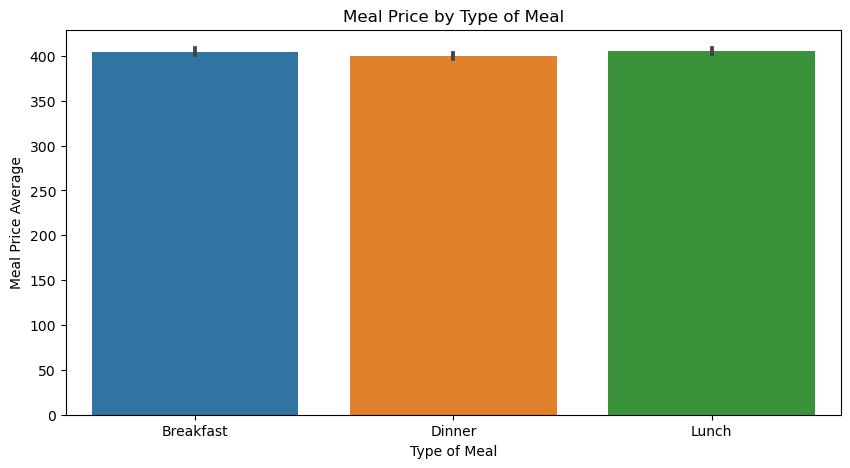

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=merge_data, x='Type of Meal', y='Meal Price')

plt.xlabel('Type of Meal')
plt.ylabel('Meal Price Average')
plt.title('Meal Price by Type of Meal')
plt.show()

There is no significant difference based on type of meal, as we can see in the graphic. 

#### Analysis 2:
Test whether meal price differs based on type of company

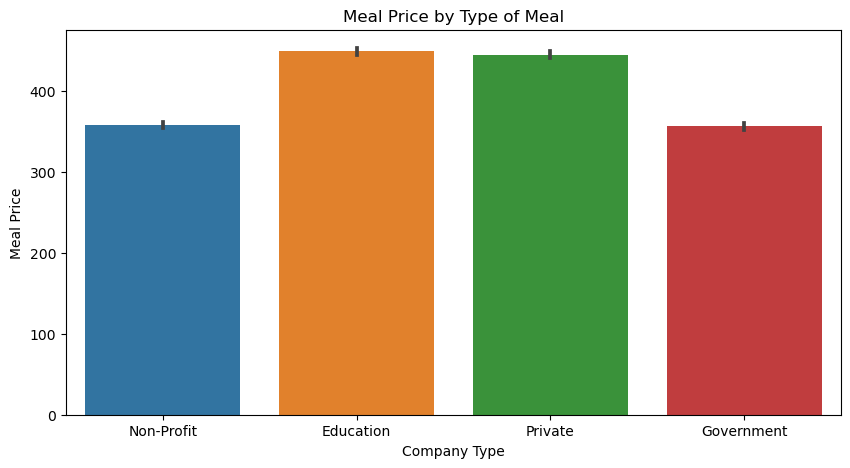

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(data=merge_data, x='Company Type', y='Meal Price')

plt.xlabel('Company Type')
plt.ylabel('Meal Price')
plt.title('Meal Price by Type of Meal')
plt.show()

For education and private companies, the meal prices are higher. For Non-Profits and Government, the meal price is lower.

#### Analysis 3:

Test whether conversion (whether the order was ultimately placed) differs based on type of company

#### Future Directions:
Based on your exploration of the data so far, list two immediate next steps you would take to further derive meaning and actionable insight from this data.